In [1]:
from importlib import reload

In [2]:
import src.tm_roller; reload(src.tm_roller)

import src.bsln_kde;reload(src.bsln_kde)

from src.tm_roller import TM_ROLLER
from src.bsln_kde import KDE, prep_data
from src.spatial_unit import baltimore_grids
from src.eval_metric import hit_rate


In [3]:
data = prep_data('data/open-baltimore/raw/BPD_Part_1_Victim_Based_Crime_Data.csv', 
                 col_lon='Longitude', col_lat='Latitude', col_date='CrimeDate', to_epsg=3559)

In [4]:
tune_sd = '2013-01-01'
tune_ed = '2013-12-31'
train_tw = 60
vstep = 1
vtw = 1
vsd = '2014-03-02'
ved = '2014-03-10'
grid_size=200

In [5]:
grids = baltimore_grids(grid_size=grid_size)

# for each tune period

In [6]:
method = KDE(verbose=1)

In [7]:
str(method)

'KDE(bandwidth=1, timewindow=60, verbose=1)'

In [8]:
method.tune(data.loc[tune_sd:tune_ed].coords, cv=10, bw_choice=[10, 100, 200, 300, 400, 500], n_jobs=4)

converting pd.Series to list
[10, 100, 200, 300, 400, 500]
gridsearching bw
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 23.7min


best parameters: {'bandwidth': 100}


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 33.3min finished


In [9]:
tmroller = TM_ROLLER(method, data.coords, vsd, ved, step=vstep, tw=vtw)

In [10]:
res = tmroller.eval(hit_rate, grids)

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame.from_dict(res)

In [13]:
df

,2014-03-02~2014-03-02,2014-03-03~2014-03-03,2014-03-04~2014-03-04,2014-03-05~2014-03-05,2014-03-06~2014-03-06,2014-03-07~2014-03-07,2014-03-08~2014-03-08,2014-03-09~2014-03-09,2014-03-10~2014-03-10
10%,0.494118,0.421053,0.412371,0.456311,0.429907,0.477064,0.519231,0.408602,0.480916
20%,0.729412,0.666667,0.639175,0.601942,0.635514,0.660550,0.663462,0.623656,0.664122
30%,0.847059,0.789474,0.814433,0.689320,0.757009,0.853211,0.721154,0.774194,0.763359
40%,0.917647,0.894737,0.907216,0.844660,0.831776,0.935780,0.846154,0.903226,0.877863
50%,0.964706,0.947368,0.958763,0.912621,0.897196,0.954128,0.903846,0.967742,0.961832
60%,1.000000,0.964912,0.969072,1.000000,0.953271,0.972477,0.932692,1.000000,0.992366
70%,1.000000,0.982456,0.989691,1.000000,1.000000,1.000000,0.951923,1.000000,1.000000
80%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
%matplotlib inline

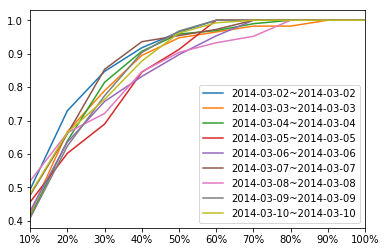

In [15]:
df.plot()